In [1]:
%matplotlib notebook
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
from main import FileHospitalGeneralData
#from main import FileHosipitalSpendingNationalData
from main import FilePhysicianData
from main import FilePhysicianNationalData
from main import FilePhysicianGroupMIPSData
from main import FilePhysicianIndivialMIPSData

In [3]:
hospitalgeneraldata=DataLoader.LoadFile(FileHospitalGeneralData)

In [4]:
hospitalgeneraldata.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,010005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Not Available,16.0,Same as the national average,NaN,Above the national average,NaN,Not Available,5.0


In [5]:
hospitalgeneraldata.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [6]:
hospitalgeneraldata = pd.DataFrame(hospitalgeneraldata)
MeasuresDF = pd.DataFrame(hospitalgeneraldata[['Effectiveness of care national comparison','Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'Patient experience national comparison', 'Readmission national comparison']])
#print ("Before cleaning", len(MeasuresDF.index))

In [7]:
# Delete these row indexes from dataFrame
MeasuresDF = MeasuresDF.loc[(MeasuresDF['Timeliness of care national comparison'] != "Not Available") & 
                          (MeasuresDF['Efficient use of medical imaging national comparison'] != "Not Available") &
                          (MeasuresDF['Effectiveness of care national comparison'] != "Not Available") &
                          (MeasuresDF['Patient experience national comparison'] != "Not Available") &
                          (MeasuresDF['Readmission national comparison'] != "Not Available")] 
#print ("After cleaning", len(MeasuresDF.index))
PiePlotDF = MeasuresDF.rename(columns={"Effectiveness of care national comparison": "Effectiveness of care","Timeliness of care national comparison": "Timeliness of care","Efficient use of medical imaging national comparison": "Efficient use of medical imaging","Patient experience national comparison": "Patient experience","Readmission national comparison": "Readmission"})

,Effectiveness of care,Timeliness of care,Efficient use of medical imaging,Patient experience,Readmission
0,Same as the national average,Same as the national average,Same as the national average,Below the national average,Below the national average
1,Same as the national average,Above the national average,Below the national average,Same as the national average,Above the national average
2,Same as the national average,Above the national average,Below the national average,Below the national average,Above the national average
3,Below the national average,Above the national average,Same as the national average,Same as the national average,Below the national average
5,Below the national average,Below the national average,Same as the national average,Below the national average,Same as the national average


<IPython.core.display.Javascript object>


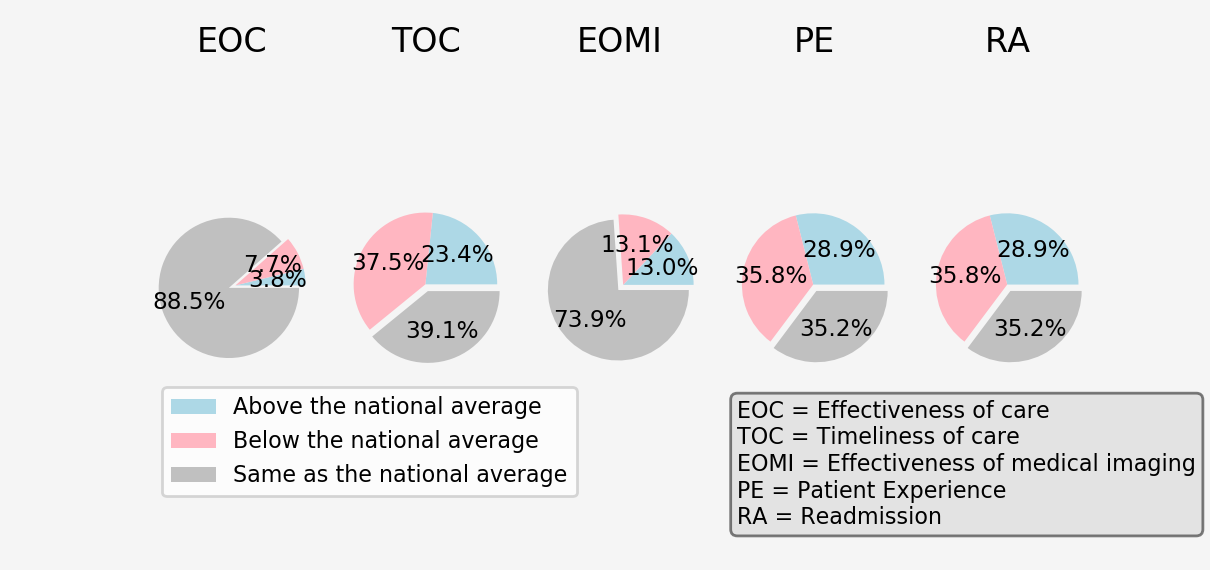

<IPython.core.display.Javascript object>


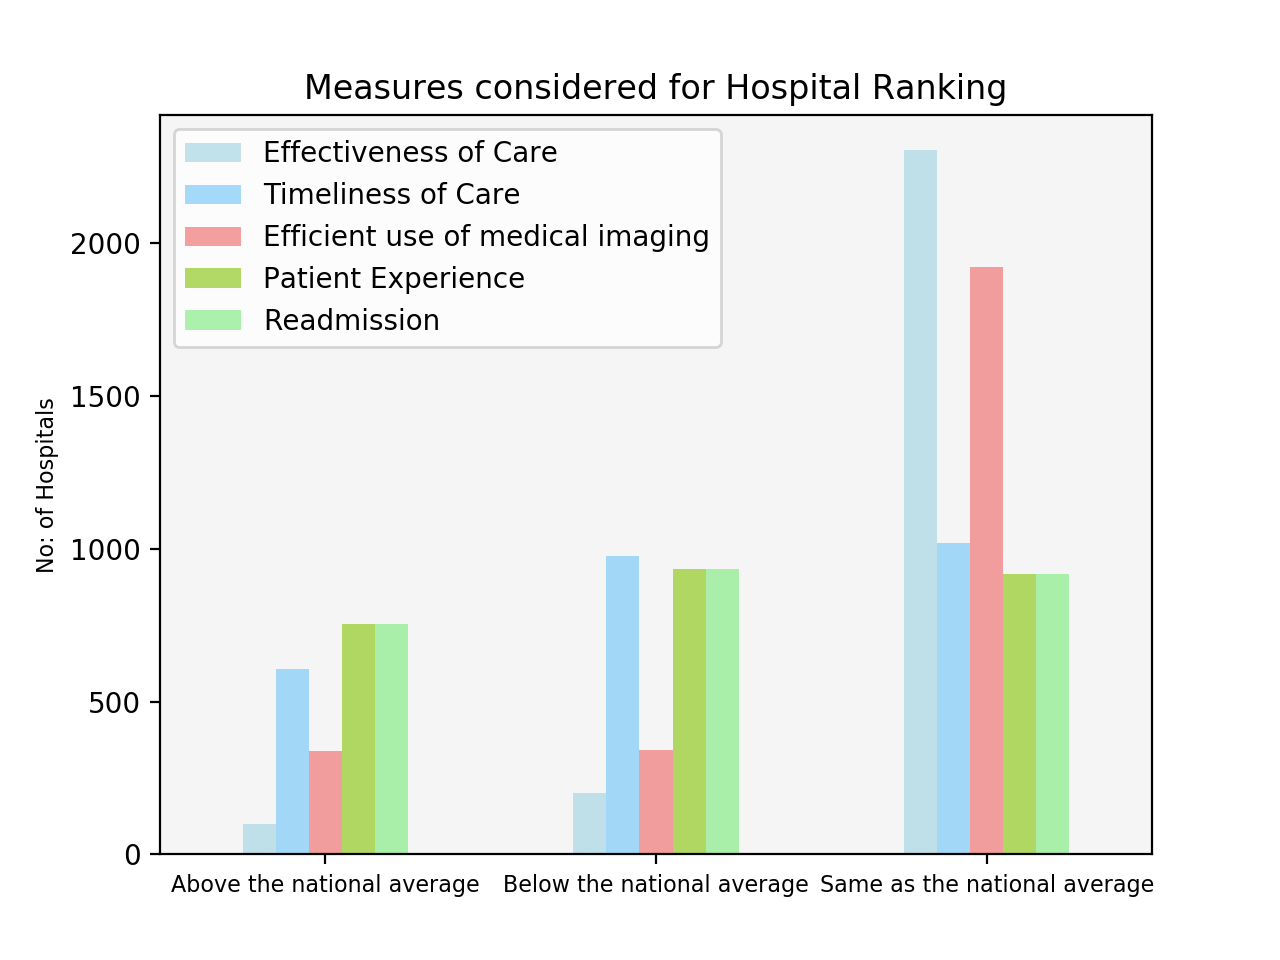

<IPython.core.display.Javascript object>


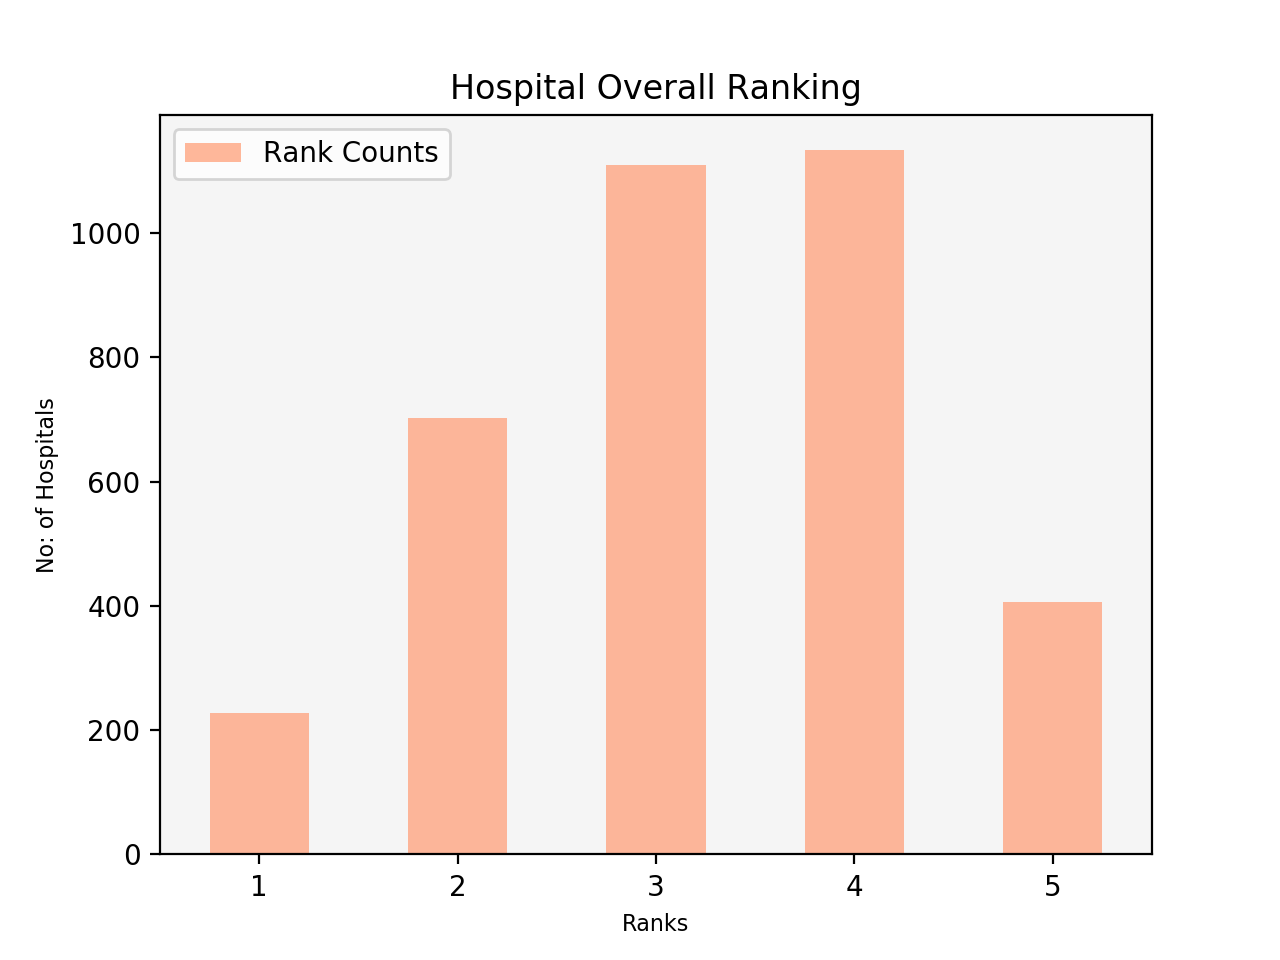

In [105]:
HospitalRatingdf = pd.DataFrame(hospitalgeneraldata['Hospital overall rating'])
HospitalRatingdf = HospitalRatingdf.loc[(HospitalRatingdf['Hospital overall rating'] != "Not Available")]

#Counting the number of Hospitals under each rank
seriesRatings = pd.Series(HospitalRatingdf['Hospital overall rating'])
rank1_counts = seriesRatings.str.count("1").sum()
rank2_counts = seriesRatings.str.count("2").sum()
rank3_counts = seriesRatings.str.count("3").sum()
rank4_counts = seriesRatings.str.count("4").sum()
rank5_counts = seriesRatings.str.count("5").sum()

#Getting the counts of each measure from individual parameters
seriesEFC = pd.Series(PiePlotDF['Effectiveness of care'])
EFC_above_counts = seriesEFC.str.count("Above the national average").sum()
EFC_below_counts = seriesEFC.str.count("Below the national average").sum()
EFC_same_counts = seriesEFC.str.count("Same as the national average").sum()

seriesTOC = pd.Series(PiePlotDF['Timeliness of care'])
TOC_above_counts = seriesTOC.str.count("Above the national average").sum()
TOC_below_counts = seriesTOC.str.count("Below the national average").sum()
TOC_same_counts = seriesTOC.str.count("Same as the national average").sum()

seriesEUMI = pd.Series(PiePlotDF['Efficient use of medical imaging'])
EUMI_above_counts = seriesEUMI.str.count("Above the national average").sum()
EUMI_below_counts = seriesEUMI.str.count("Below the national average").sum()
EUMI_same_counts = seriesEUMI.str.count("Same as the national average").sum()

seriesPE = pd.Series(PiePlotDF['Patient experience'])
PE_above_counts = seriesPE.str.count("Above the national average").sum()
PE_below_counts = seriesPE.str.count("Below the national average").sum()
PE_same_counts = seriesPE.str.count("Same as the national average").sum()

seriesR = pd.Series(PiePlotDF['Patient experience'])
R_above_counts = seriesR.str.count("Above the national average").sum()
R_below_counts = seriesR.str.count("Below the national average").sum()
R_same_counts = seriesR.str.count("Same as the national average").sum()

Count_summary_df=pd.DataFrame({"Effectiveness of Care": [EFC_above_counts, EFC_below_counts, EFC_same_counts], 
                   "Timeliness of Care": [TOC_above_counts, TOC_below_counts, TOC_same_counts],
                   "Efficient use of medical imaging": [EUMI_above_counts, EUMI_below_counts, EUMI_same_counts],
                   "Patient Experience": [PE_above_counts, PE_below_counts, PE_same_counts],
                    "Readmission": [R_above_counts, R_below_counts, R_same_counts],}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

Ranking_df = pd.DataFrame({"Rank Counts": [rank1_counts,rank2_counts,rank3_counts,rank4_counts,rank5_counts]}, index=['1','2','3','4','5'])

Row_names = Count_summary_df.index.values
labels = list(Row_names)
EOC_list = Count_summary_df["Effectiveness of Care"]
TOC_list = Count_summary_df["Timeliness of Care"]
EOMI_list = Count_summary_df["Efficient use of medical imaging"]
PE_list = Count_summary_df["Patient Experience"]
R_list = Count_summary_df["Readmission"]
explode = (0, 0, 0.1) 
colors = ['lightblue', 'lightpink', 'silver']

fig = plt.figure(figsize=(6.05, 2.85))
fig.set_facecolor('whitesmoke')
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Pie Plots
ax1.pie(EOC_list, explode=explode,  colors=colors, autopct='%0.1f%%', textprops={'size': 'smaller'}, shadow=False)
ax1.set_title("EOC")
ax2.pie(TOC_list, explode=explode,  colors=colors, autopct='%0.1f%%', textprops={'size': 'smaller'}, shadow=False)
ax2.set_title("TOC")
ax3.pie(EOMI_list, explode=explode,  colors=colors, autopct='%0.1f%%', textprops={'size': 'smaller'}, shadow=False)
ax3.set_title("EOMI")
ax4.pie(PE_list, explode=explode,  colors=colors, autopct='%0.1f%%',  textprops={'size': 'smaller'},shadow=False)
ax4.set_title("PE")
ax5.pie(R_list, explode=explode,  colors=colors, autopct='%0.1f%%', textprops={'size': 'smaller'}, shadow=False)
ax5.set_title("RA")

first_legend = ax1.legend(labels, loc = 'lower left', fontsize=8)
textstr = '\n'.join((
    "EOC = Effectiveness of care",
    "TOC = Timeliness of care",
    "EOMI = Effectiveness of medical imaging",
    "PE = Patient Experience",
    "RA = Readmission" ))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
ax4.text(0.025, -0.05, textstr, transform=ax4.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax4.axis('equal')
ax5.axis('equal')
plt.savefig('Pie-Charts-Percentage.png')
plt.show()

#Plotting parameters of measuring hospital ratings at national level
fig2 = Count_summary_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen", "lightgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('Measures-National-Compare.png')
plt.title("Measures considered for Hospital Ranking")
fig2.set_facecolor('whitesmoke')

# Plotting number of hospitals rated under each rank
fig3 = Ranking_df.plot(kind='bar', color=["lightsalmon"], alpha=0.75, rot=0)
plt.xlabel("Ranks", fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.title("Hospital Overall Ranking")
plt.savefig('Hospital-Overall-Ranking.png')
fig3.set_facecolor('whitesmoke')

